In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv("Data/hotel_bookings.csv")#import the data in the project
df.head()

: 

## Clean the Data

In [ ]:
df.shape

: 

In [ ]:
df.isna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#not available data
def data_clean(df):
    df.fillna(0,inplace = True) #zero imputation
    print(df.isna().sum())

In [ ]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
list_cols = ["children","adults","babies"]

for i in list_cols:
    print(f"{i} has unique value is {df[i].unique}")

children has unique value is <bound method Series.unique of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64>
adults has unique value is <bound method Series.unique of 0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: adults, Length: 119390, dtype: int64>
babies has unique value is <bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: babies, Length: 119390, dtype: int64>


In [ ]:
list_cols = ["children","adults","babies"]

for i in list_cols:
    print(f"{i} has unique values as {df[i].unique()}")

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [ ]:
#clean the data

filtered_data = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)# no one came

final_data = df[~filtered_data]

In [ ]:
final_data.shape

(119210, 32)

# Where do the guest come from? (spatial analysis)

In [ ]:
country_wise_data = final_data[final_data['is_canceled'] == 0] ['country'].value_counts(). reset_index()

country_wise_data.columns = ["Country","No.of guest"]
print(country_wise_data)

    Country  No.of guest
0       PRT        20977
1       GBR         9668
2       FRA         8468
3       ESP         6383
4       DEU         6067
..      ...          ...
161     BHR            1
162     DJI            1
163     MLI            1
164     NPL            1
165     FRO            1

[166 rows x 2 columns]


In [ ]:
import plotly.express as px

In [ ]:
map_guests = px.choropleth(country_wise_data, locations = country_wise_data['Country'],
                           color = country_wise_data["No.of guest"],
                           hover_name = country_wise_data['Country'],
                           title = "Home country of guests"
                          )
map_guests.show()

# How much do guest pay for a room per night?

In [ ]:
final_data.head()

: 

In [ ]:
final_data['hotel'].unique()


array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

In [ ]:
data = final_data[final_data["is_canceled"] == 0]

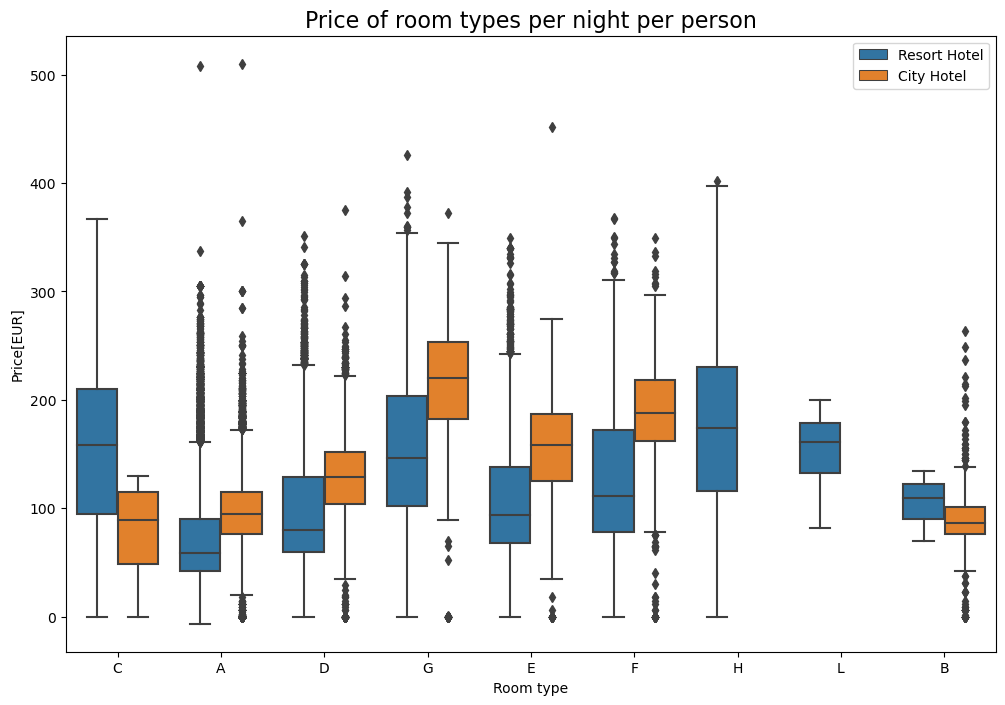

In [ ]:
#boxplot
plt.figure(figsize = (12,8)) #defoult

sns.boxplot(x = "reserved_room_type",
            y = "adr",
           hue = "hotel",data = data )
plt.title("Price of room types per night per person", fontsize = 16)
plt.xlabel("Room type")
plt.ylabel("Price[EUR]")
plt.legend(loc = "upper right")
plt.show()

# How does the price per night(adr)vary over the year?

In [ ]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
data_resort = final_data[(final_data["hotel"] == "Resort Hotel") & (final_data["is_canceled"] == 0)]
data_city = final_data[(final_data["hotel"] == "City Hotel") & (final_data["is_canceled"] == 0)]


In [ ]:
#resort hotel:variable:data_resort

#adr attribute :

#how many people came to resort hotel per month
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
#how many people came to city hotel per month
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
final = resort_hotel.merge(city_hotel, on = "arrival_date_month")

final.columns = ["month","price_for_resort_hotel","price_for_city_hotel"]

In [ ]:
print(final)

        month  price_for_resort_hotel  price_for_city_hotel
0       April               75.867816            111.962267
1      August              181.205892            118.674598
2    December               68.410104             88.401855
3    February               54.147478             86.520062
4     January               48.761125             82.330983
5        July              150.122528            115.818019
6        June              107.974850            117.874360
7       March               57.056838             90.658533
8         May               76.657558            120.669827
9    November               48.706289             86.946592
10    October               61.775449            102.004672
11  September               96.416860            112.776582


# sort the month


In [ ]:
test = final

In [ ]:
from calendar import month_name

def sort_month(df,colname):
    month_dict = { j:i for i,j in enumerate(month_name) }#dictionary comprehension
    df["month_num"] = df[colname].apply(lambda x:month_dict[x])
    return df.sort_values(by = "month_num").reset_index().drop(['index','month_num'], axis = 1)

In [ ]:
sort_month(test,"month")

,month,price_for_resort_hotel,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


<Axes: xlabel='month'>

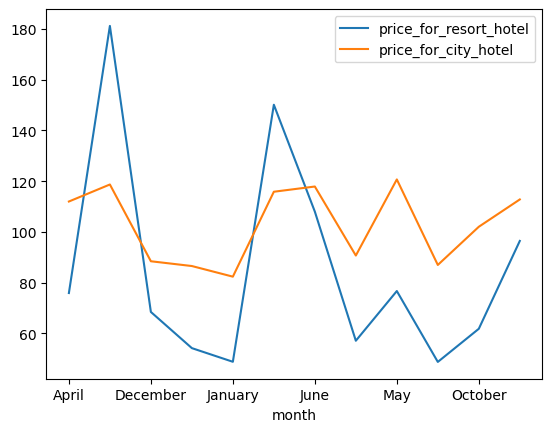

In [ ]:
final.plot(kind = "line",x ="month",y = ['price_for_resort_hotel','price_for_city_hotel'])

# Which are the most busy month or in which month Guests are high?


In [ ]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
rush_resort = data_resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns = ["month","no.of Guest"]
print(rush_resort)

        month  no.of Guest
0      August         3257
1        July         3137
2     October         2575
3       March         2571
4       April         2550
5         May         2535
6    February         2308
7   September         2102
8        June         2037
9    December         2014
10   November         1975
11    January         1866


In [ ]:
rush_city = data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns = ["month","no.of Guest"]
print(rush_city)

        month  no.of Guest
0      August         5367
1        July         4770
2         May         4568
3        June         4358
4     October         4326
5   September         4283
6       March         4049
7       April         4010
8    February         3051
9    November         2676
10   December         2377
11    January         2249


In [ ]:
#merge two dataframes rush_resort,rush_city

final_rush = rush_resort.merge(rush_city,on = "month")

final_rush.columns = ["month","no.of Guest in resort hotel","no.of Guest in city hotel"]

In [ ]:
print(final_rush)

        month  no.of Guest in resort hotel  no.of Guest in city hotel
0      August                         3257                       5367
1        July                         3137                       4770
2     October                         2575                       4326
3       March                         2571                       4049
4       April                         2550                       4010
5         May                         2535                       4568
6    February                         2308                       3051
7   September                         2102                       4283
8        June                         2037                       4358
9    December                         2014                       2377
10   November                         1975                       2676
11    January                         1866                       2249


In [ ]:
final_rush = sort_month(final_rush,"month")
print(final_rush)

        month  no.of Guest in resort hotel  no.of Guest in city hotel
0     January                         1866                       2249
1    February                         2308                       3051
2       March                         2571                       4049
3       April                         2550                       4010
4         May                         2535                       4568
5        June                         2037                       4358
6        July                         3137                       4770
7      August                         3257                       5367
8   September                         2102                       4283
9     October                         2575                       4326
10   November                         1975                       2676
11   December                         2014                       2377


<Axes: xlabel='month'>

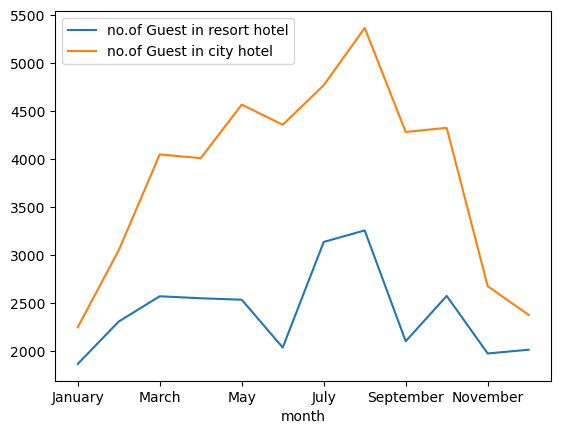

In [ ]:
#plot line plot

final_rush.plot(kind = "line",x = "month",y = ["no.of Guest in resort hotel","no.of Guest in city hotel"])